<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;" />

# 04-SciPy 

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En definitiva, nos proporciona una serie de comandos de alto nivel para realizar acciones como:_

* Integración numérca.
* Resolver un sistema de ecuaciones por el _método de Newton_, bisección...
* Resolver EDOs.
    
_Incluso otras más especializadas como:_

* [Ajuste e interpolación de datos.](http://pybonacci.wordpress.com/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/)
* [Teoría de control](http://pybonacci.wordpress.com/2013/10/10/teoria-de-control-en-python-con-scipy-i/).
* Procesamiento de imágenes.
* Estadística.
* ...

_Cada una de estas tareas pertenece a un subpaquete distinto de `SciPy`. __En la clase de hoy nos centraremos en las tres primeras__, pero seguro que si quieres hincarle el diente a alguna de las otras no tienes ningún problema._



|   Subpackage   | Description |
| ----------     | :---       |
| constants      |    Physical and mathematical constants         |
| integrate      |    Integration and ordinary differential equation solvers |
| interpolate    |	Interpolation and smoothing splines |
| linalg         |	Linear algebra |
| signal         |	Signal processing |
| special        | 	Special functions |
| stats          |	Statistical distributions and functions |

# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import integrate

In [3]:
from IPython.display import HTML
HTML('<iframe src="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" width="800" height="600"></iframe>')

### quad

Como se puede ver en la ayuda, si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`... La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. Sin emabrgo, sería más normal importar del siguiete modo:

In [4]:
from scipy.integrate import quad

De este modo se puede usar la función quad, simplemente como `quad`. Pero todavía no sabemos cómo funciona, ¿te atreves a investigarlo tú?

Quizá [esta ayuda](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) te resulte más atractiva.

¿Qué es lo primero que necesitamos hacer para integrar una función? Pues sí, la función... definamos una:

$$f(x) = x \cdot sin(x)$$

In [5]:
def fun(x):
    return x * np.sin(x)

#### Ahora integremos con `quad`

__Integremos__ la función en el intervalo $[2, 9]$. Recuerda que esto te calcula la integral, _no el área_:

In [6]:
value, err = quad(fun, 2, 9)
print("El resultado es: ", value, "con un error de: ", err)

El resultado es:  6.870699742283883 con un error de:  2.864870105641461e-13


#### Simpson y trapecio

Según figura en la documentación a estos métodos hay que pasarles las coordenadas de los puntos (no la función). Esto puede ser útil si no disponemos de una función, sino de una serie da valores, que por ejemplo, provienen de un experimento.

![](../static/trap_xsinx.png)

_¿Te acuerdas de todos esos esquemas numéricos para integrar ecuaciones diferenciales ordinarias? Es bueno saber que existen y qué peculiaridades tiene cada uno, pero en este curso no queremos implementar esos esquemas: queremos resolver las ecuaciones. Los problemas de evolución están por todas partes en ingeniería y son de los más divertidos de programar._

In [7]:
import numpy as np

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

## Ecuaciones no lineales

Visto cómo resolver sistemas de ecuaciones lineales, tal vez sea incluso más atractivo resolver ecuaciones no lineales. Para ello, importaremos el paquete `optimize` de SciPy:

In [9]:
from scipy import optimize

La ayuda de este paquete es bastante larga (puedes consultarla también en http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). El paquete `optimize` incluye multitud de métodos para **optimización**, **ajuste de curvas** y **búsqueda de raíces**. Vamos a centrarnos ahora en la búsqueda de raíces de funciones escalares. Para más información puedes leer http://pybonacci.org/2012/10/25/como-resolver-ecuaciones-algebraicas-en-python-con-scipy/

<div class="alert alert-info">**Nota**: La función `root` se utiliza para hallar soluciones de *sistemas* de ecuaciones no lineales así que obviamente también funciona para ecuaciones escalares. No obstante, vamos a utilizar las funciones `brentq` y `newton` para que el método utilizado quede más claro.</div>

Hay básicamente dos tipos de algoritmos para hallar raíces de ecuaciones no lineales:

* Aquellos que operan en un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. Más lentos, convergencia asegurada.
* Aquellos que operan dando una condición inicial $x_0$ más o menos cerca de la solución. Más rápidos, convergencia condicionada.

De los primeros vamos a usar la función `brentq` (aunque podríamos usar `bisect`) y de los segundos vamos a usar `newton` (que en realidad engloba los métodos de Newton y de la secante).

**Ejemplo**:

$\ln{x} = \sin{x} \Rightarrow F(x) \equiv \ln{x} - \sin{x} = 0$

Lo primero que tengo que hacer es definir la ecuación, que matemáticamente será una función $F(x)$ que quiero igualar a cero.

In [10]:
def F(x):
    return np.log(x) - np.sin(x)

Para hacernos una idea de las posibles soluciones siempre podemos representar gráficamente esa función:

/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


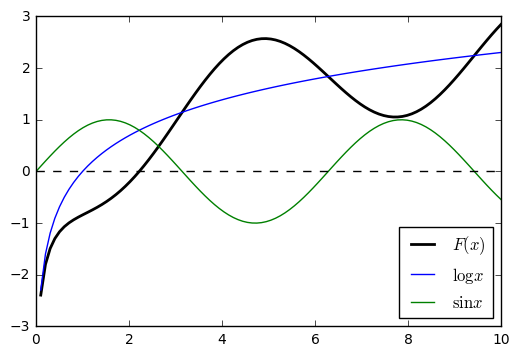

In [11]:
x = np.linspace(0, 10, num=100)
plt.plot(x, F(x), 'k', lw=2, label="$F(x)$")
plt.plot(x, np.log(x), label="$\log{x}$")
plt.plot(x, np.sin(x), label="$\sin{x}$")
plt.plot(x, np.zeros_like(x), 'k--')
plt.legend(loc=4)

Y utilizando por ejemplo el método de Brent en el intervalo $[0, 3]$:

In [12]:
optimize.brentq(F, 0, 3)

/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


2.219107148913746

<div class="alert alert-warning">¿No habíamos dicho que en Python no se puede dividir por cero? Observa esto:</div>

In [13]:
1 / 0

ZeroDivisionError: division by zero

In [14]:
1 / np.array([0])

/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([ inf])

<div class="alert alert-warning">Si manejamos arrays de NumPy las operaciones siguen las reglas dadas en el estándar de punto flotante (IEEE 754). Las divisiones por cero resultan en infinito, 0 / 0 es NaN, etc. Podemos controlar si queremos warnings o errores con la función `np.seterr`.</div>

### Ejercicio

Obtener por ambos métodos (`newton` y `brentq`) una solución a la ecuación $\tan{x} = x$ distinta de $x = 0$. Visualizar el resultado.

### Argumentos extra

Nuestras funciones siempre tienen que tomar como primer argumento la incógnita, el valor que la hace cero. Si queremos incluir más, tendremos que usar el argumento `args` de la funciones de búsqueda de raíces. Este patrón se usa también en otras partes de SciPy, como ya veremos.

Vamos a resolver ahora una ecuación que depende de un parámetro:

$$\sqrt{x} + \log{x} = C$$.

In [15]:
def G(x, C):
    return C - np.sqrt(x) - np.log(x)

**Nuestra incógnita sigue siendo $x$**, así que debe ir en primer lugar. El resto de parámetros van a continuación, y sus valores se especifican a la hora de resolver la ecuación usando `args`:

In [16]:
optimize.newton(G, 2.0, args=(2,))

1.8773216666875554

### Flujo compresible

Esta es la relación isentrópica entre el número de Mach $M(x)$ en un conducto de área $A(x)$:

$$ \frac{A(x)}{A^*} = \frac{1}{M(x)} \left( \frac{2}{1 + \gamma} \left( 1 + \frac{\gamma - 1}{2} M(x)^2 \right) \right)^{\frac{\gamma + 1}{2 (\gamma - 1)}}$$

Para un conducto convergente:

$$ \frac{A(x)}{A^*} = 3 - 2 x \quad x \in [0, 1]$$

Hallar el número de Mach en la sección $x = 0.9$.

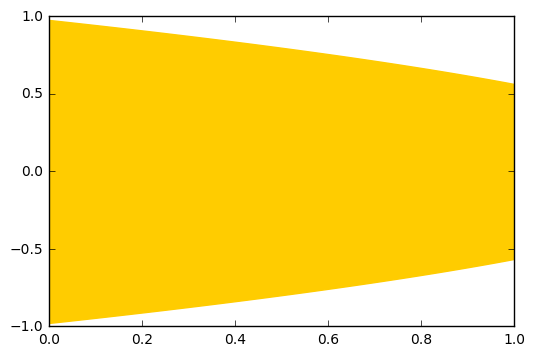

In [17]:
def A(x):
    return 3 - 2 * x

x = np.linspace(0, 1)
area = A(x)
r = np.sqrt(area / np.pi)
plt.fill_between(x, r, -r, color="#ffcc00")

¿Cuál es la función $F$ ahora? Hay dos opciones: definir una función $F_{0.9}(M)$ que me da el número de Mach en la sección $0.9$ o una función $F(M; x)$ con la que puedo hallar el número de Mach en cualquier sección. *Bonus points* si haces la segunda opción :)

Para resolver la ecuación utiliza el método de Brent (bisección). ¿En qué intervalo se encontrará la solución? ¡Si no te haces una idea es tan fácil como pintar la función $F$!

In [18]:
def F(M, x, g):
    return A(x) - (1 / M) * ((2 / (1 + g)) * (1 + (g - 1) / 2 * M ** 2)) ** ((g + 1) / (2 * (g - 1))) 

In [19]:
optimize.brentq(F, 0.01, 1, args=(0.9, 1.4))

0.5902487609888621

### Ecuación de Kepler

Representar la ecuación de Kepler

$$M = E - e \sin E$$

que relaciona dos parámetros geométricos de las órbitas elípticas, la anomalía media $M$ y la anomalía excéntrica $E$.

![Anomalías excéntrica y media](http://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Kepler%27s-equation-scheme.png/250px-Kepler%27s-equation-scheme.png)

para los siguientes valores de excentricidad:

* Tierra: $0.0167$
* Plutón: $0.249$
* Cometa Holmes: $0.432$
* 28P/Neujmin: $0.775$
* Cometa Halley: $0.967$

Para reproducir esta gráfica:

In [20]:
from IPython.display import HTML
HTML('<iframe src="http://en.m.wikipedia.org/wiki/Kepler%27s_equation" width="800" height="400"></iframe>')

Para ello utilizaremos el método de Newton (secante).

1- Define la función correspondiente a la ecuación de Kepler, que no solo es una ecuación implícita sino que además depende de un parámetro. ¿Cuál es la incógnita?

In [21]:
def F(E, e, M):
    return M - E + e * np.sin(E)

2- Como primer paso, resuélvela para la excentricidad terrerestre y anomalía media $M = 0.3$. ¿Qué valor escogerías como condición inicial?

In [22]:
optimize.newton(F, 0.3, args=(0.0167, 0.3))

0.30501513714875778

3- Como siguiente paso, crea un dominio (`linspace`) de anomalías medias entre $0$ y $2 \pi$ y resuelve la ecuación de Kepler con excentricidad terrestre para todos esos valores. Fíjate que necesitarás un array donde almacenar las soluciones. Representa la curva resultante.

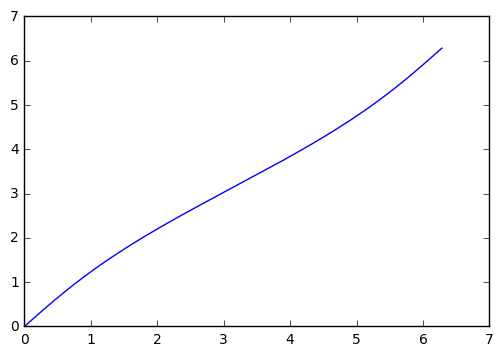

In [23]:
N = 500

M = np.linspace(0, 2 * np.pi, N)
sol = np.zeros_like(M)

for ii in range(N):
    sol[ii] = optimize.newton(F, sol[ii - 1], args=(0.249, M[ii]))

plt.plot(M, sol)

4- Como último paso, solo tienes que meter parte del código que ya has escrito en un bucle que cambie el valor de la excentricidad 5 veces. Es aconsejable que tengas todo ese código en una única celda (esta de aquí abajo).

Vamos a introducir aquí un truco muy útil en Python:

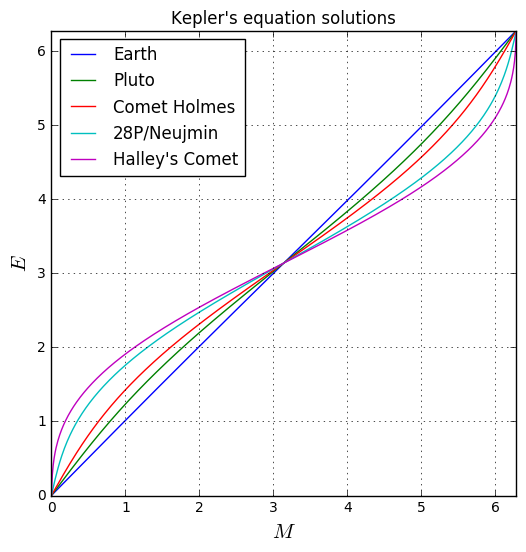

In [24]:
M = np.linspace(0, 2 * np.pi, N)
sol = np.zeros_like(M)

plt.figure(figsize=(6, 6))

for ee in 0.0167, 0.249, 0.432, 0.775, 0.967:
    # Para cada valor de excentricidad sobreescribimos el array sol
    for ii in range(N):
        sol[ii] = optimize.newton(F, sol[ii - 1], args=(ee, M[ii]))
    plt.plot(M, sol)

plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)
plt.xlabel("$M$", fontsize=15)
plt.ylabel("$E$", fontsize=15)
plt.gca().set_aspect(1)
plt.grid(True)
plt.legend(["Earth", "Pluto", "Comet Holmes", "28P/Neujmin", "Halley's Comet"], loc=2)
plt.title("Kepler's equation solutions")

## Ecuaciones diferenciales ordinarias

Para integrar EDOs vamos a usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-error">**¡Importante!**: La función del sistema recibe como primer argumento $\mathbf{y}$ (un array) y como segundo argumento el instante $t$ (un escalar). Esta convención va exactamente al revés que en MATLAB y si se hace al revés obtendremos errores o, lo que es peor, resultados incorrectos.</div>

In [25]:
from scipy.integrate import odeint

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos:

$$y' + y = 0$$

$$f(y, t) = \frac{dy}{dt} = -y$$

In [26]:
def f(y, t):
    return -y

Condiciones iniciales:

In [27]:
y0 = 1

Vector de tiempos donde realizamos la integración:

In [28]:
t = np.linspace(0, 3)

Integramos y representamos la solución:

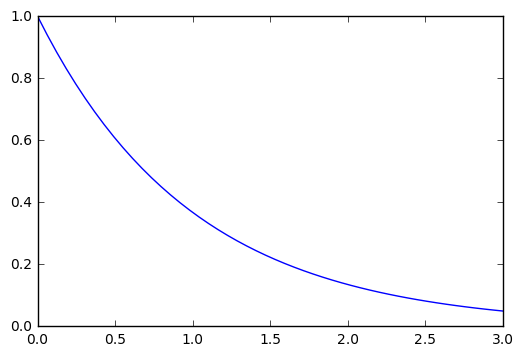

In [29]:
sol = odeint(f, y0, t)
plt.plot(t, sol)

### EDOs de orden superior

Tendremos que acordarnos ahora de cómo reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$

$$\mathbf{y} \leftarrow \pmatrix{y \\ y'}$$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

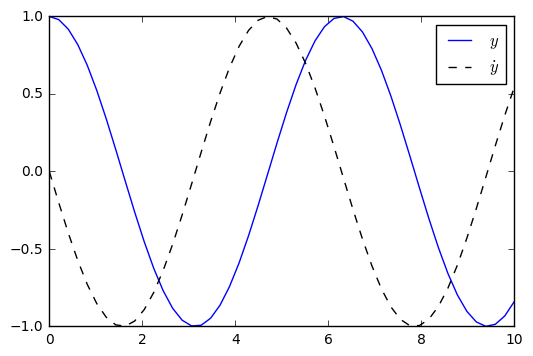

In [30]:
def f(y, t):
    return np.array([y[1], -y[0]])

t = np.linspace(0, 10)
y0 = np.array([1.0, 0.0])

sol = odeint(f, y0, t)

plt.plot(t, sol[:, 0], label='$y$')
plt.plot(t, sol[:, 1], '--k', label='$\dot{y}$')
plt.legend()

## Para ampliar

En nuestra edición anterior del curso de AeroPython puedes ver una aplicación muy interesante de lo que hemos visto hasta ahora al **salto de Felix Baumgartner**. ¡Aquí lo tienes!

http://nbviewer.ipython.org/github/AeroPython/Curso_AeroPython/blob/v1.0/Notebooks/Clase6b_Finale.ipynb

$$\displaystyle m \frac{d^2 y}{d t^2} = -m g + D$$

Si probamos con `st.normaltest` que también comprueba la bondad del ajuste obtenemos un _valor-p_ más alto:

## Interpolación y ajuste 

_La últimas tareas importantes que vamos a ver cómo hacer con SciPy van a ser **interpolar** y **ajustar** una serie de puntos. Son tareas diferentes que aprovecharemos en circunstancias distintas, pero ambas muy útiles. Esta clase está basada en el artículo http://pybonacci.org/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/ _

## Dos problemas diferentes

Supongamos que tenemos una serie de puntos que representan los datos de un cierto experimento. Como ejemplo, vamos a cargar los datos de la polar de un avión que están en el archivo `polar.dat`.

In [31]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
#!cat polar.dat  Linux / Mac OS X
!type ../static/polar.dat

../static/polar.dat is ../static/polar.dat


La primera línea son los datos de $C_L$ y la segunda los datos de $C_D$. Recordamos que había que usar la función `np.loadtxt`, y en este caso no hay que especificar ningún argumento extra más porque ya por defecto detecta que los comentarios empiezan por `#`.

In [33]:
datos = np.loadtxt("../static/polar.dat")
C_L = datos[0]
C_D = datos[1]

Vamos a representar esos datos con cruces azules (pista: usar `mew=2`, "marker edge width 2", para que las cruces se vean mejor):

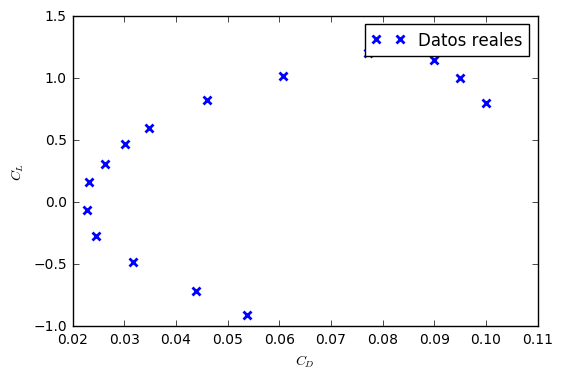

In [34]:
plt.plot(C_D, C_L, 'x', mew=2, label="Datos reales")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend()

Vemos la forma clásica de la polar de un avión. Hallando *el índice* del máximo valor de $C_L$ podemos descartar los datos fuera de la región de entrada en pérdida, y para eso necesitamos la función `np.argmax`:

In [35]:
idx_stall = np.argmax(C_L)
idx_stall

12

In [36]:
C_L[idx_stall]

1.24

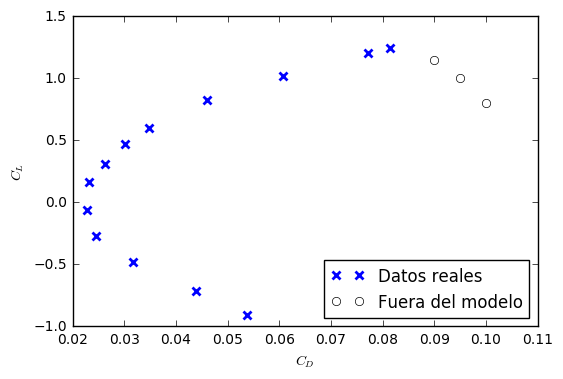

In [37]:
plt.plot(C_D[:idx_stall + 1], C_L[:idx_stall + 1], 'x', mew=2, label="Datos reales")
plt.plot(C_D[idx_stall + 1:], C_L[idx_stall + 1:], 'o', mfc='none', label="Fuera del modelo")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend(loc=4)

Hay dos cosas que nos pueden interesar:

* Como *solo tenemos puntos intermedios*, no tenemos posibilidad de evaluar, por ejemplo, $C_L$ para un $C_D$ que no esté en los datos. Si **interpolamos** la curva ya podemos hacerlo.
* Sabemos que, fuera de la región de entrada en pérdida, la polar tiene *forma parabólica*. Si **ajustamos** la curva podemos hallar el $C_{D0}$ y el $k$.

## Interpolación

Para interpolar utilizaremos el paquete `interpolate` de SciPy:

In [38]:
from scipy import interpolate

Vamos a generar unos puntos de ejemplo para explicar cómo funciona. Para eso, vamos a usar simplemente la función $\sin{x}$ en un dominio con pocos puntos:

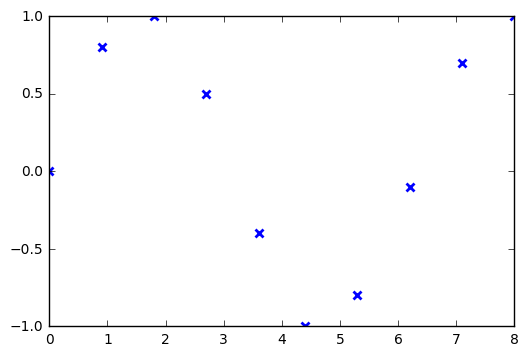

In [39]:
x_i = [0.0, 0.9, 1.8, 2.7, 3.6, 4.4, 5.3, 6.2, 7.1, 8.0]
y_i = [0.0, 0.8, 1.0, 0.5, -0.4, -1.0, -0.8, -0.1, 0.7, 1.0]
plt.plot(x_i, y_i, 'x', mew=2)

Para crear una **función interpolante** utilizaremos el objeto `InterpolatedUnivariateSpline` del paquete `interpolate`. A este objeto solo hay que pasarle los puntos de interpolación y el grado, y generará un *spline*.

In [40]:
f_interp = interpolate.InterpolatedUnivariateSpline(x_i, y_i, k=1)
f_interp

¿Cómo obtengo los puntos desde aquí? El resultado que hemos obtenido es una *función* y admite como argumento la $x$.

In [41]:
f_interp(np.pi / 2)

array(0.949065850398866)

Vamos a representar esta función junto con los puntos de interpolación. Fíjate en que, ahora que tenemos una función interpolante, podemos representarla en un dominio:

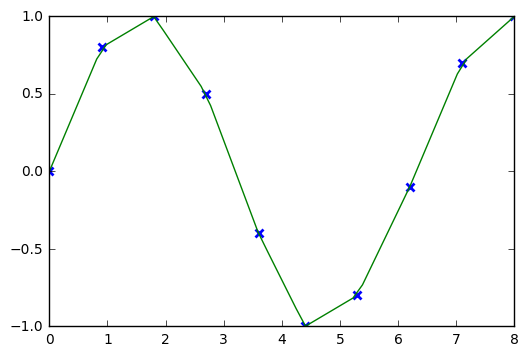

In [42]:
x = np.linspace(0, 8)
y_interp = f_interp(x)

plt.plot(x_i, y_i, 'x', mew=2)
plt.plot(x, y_interp)

Retrocede ahora y comprueba lo que pasa si cambias el grado del *spline*.

**Ejercicio**: Crear una función interpolante $C_D = f(C_L)$ usando splines de grado 2 y representarla. Utiliza solo los datos que resultan de haber eliminado la región de entrada en pérdida. y ten en cuenta que la $x$ y la $y$ para este caso están cambiadas de sitio.

1. Crea un polinomio interpolante usando los valores que encajan en el modelo parabólico.
2. Crea un dominio de $C_L$ entre `C_L.min()` y `C_L.max()`.
3. Halla los valores interpolados de $C_D$ en ese dominio.
4. Representa la función y los puntos.

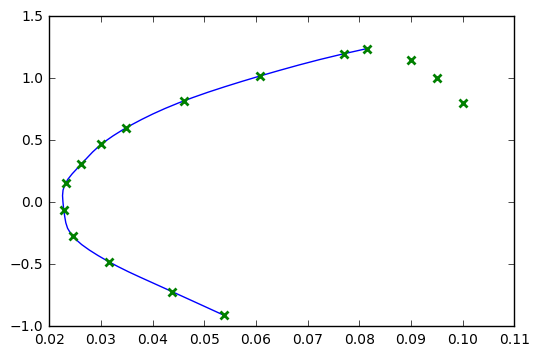

In [43]:
f_C_D = interpolate.InterpolatedUnivariateSpline(C_L[:idx_stall + 1], C_D[:idx_stall + 1], k=2)

C_L_domain = np.linspace(C_L.min(), C_L.max())
C_D_interp = f_C_D(C_L_domain)

plt.plot(C_D_interp, C_L_domain)
plt.plot(C_D, C_L, 'x', mew=2)

## Ajuste

El ajuste funciona de manera totalmente distinta: obtendremos una curva que no pasará por ninguno de los puntos originales, pero que a cambio tendrá una expresión analítica simple. Para realizar ajustes polinómicos vamos a utilizar el paquete `np.polynomial.polynomial` (sí, está dos veces).

In [44]:
from numpy.polynomial import polynomial

Vamos otra vez a generar unos datos para ver cómo funcionaría, del tipo:

$$y(x) = x^2 - x + 1 + \text{Ruido}$$

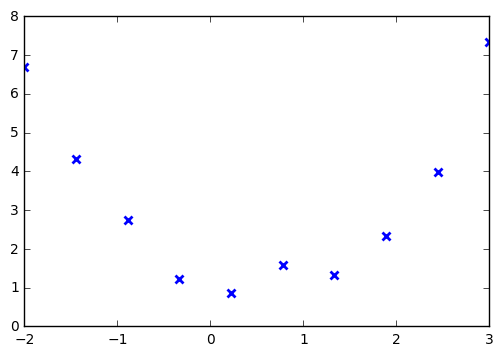

In [45]:
x_i = np.linspace(-2, 3, num=10)
y_i = x_i ** 2 - x_i + 1 + 0.5 * np.random.randn(10)
plt.plot(x_i, y_i, 'x', mew=2)

Vamos a utilizar la función `polynomial.polyfit`, que recibe los puntos de interpolación y el grado del polinomio. El resultado serán los coeficientes del mismo, **en orden de potencias crecientes**.

In [46]:
a, b, c = polynomial.polyfit(x_i, y_i, deg=2)
a, b, c

(1.0251489373130507, -0.93145876747885048, 0.96043963610226857)

¡Muy similares a lo que esperábamos! Para evaluar un polinomio con estos coeficientes, o bien construimos la función nosotros mismos o usamos la función `polynomial.polyval`:

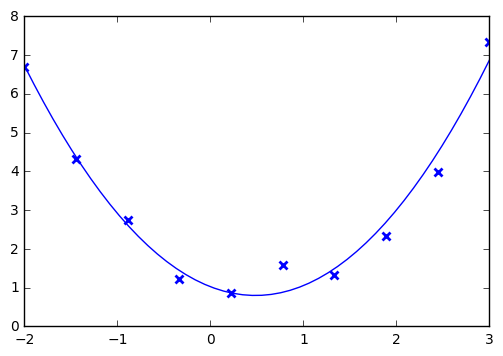

In [47]:
x = np.linspace(-2, 3)
#y_fit = a + b * x + c * x ** 2
y_fit = polynomial.polyval(x, (a, b, c))

l, = plt.plot(x, y_fit)
plt.plot(x_i, y_i, 'x', mew=2, c=l.get_color())

**Ejercicio**: Si modelizamos la polar como:

$$C_D = C_{D0} + k C_L^2$$

hallar los coeficientes $C_{D0}$ y $k$.

<p></p>

<div class="alert alert-warning">**¡Importante!** Estamos tentados de hacer un ajuste parabólico pero ese no es el camino, porque nos dará un término lineal que ya sabemos que es cero. Es mejor hacer un cambio de variable y hacer un ajuste lineal:</div>

$$y \leftarrow C_D \\ x \leftarrow C_L^2 \\ y = C_{D0} + k x$$

In [48]:
y_i = C_D[:idx_stall + 1]
x_i = C_L[:idx_stall + 1] ** 2

C_D0, k = polynomial.polyfit(x_i, y_i, deg=1)
C_D0, k

(0.022155579233867954, 0.038058791717716367)

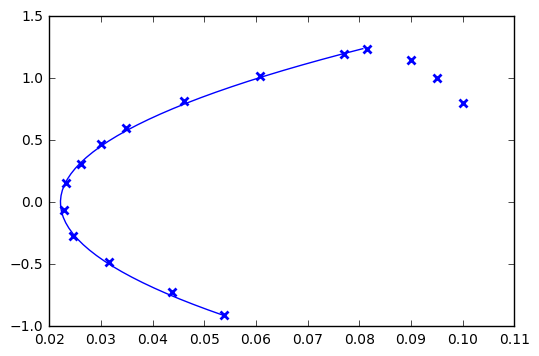

In [49]:
#C_D_fit = polynomial.polyval(C_L_domain ** 2, (C_D0, k))
C_D_fit = C_D0 + k * C_L_domain ** 2

l, = plt.plot(C_D_fit, C_L_domain)
plt.plot(C_D, C_L, 'x', mew=2, c=l.get_color())

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso_AeroPython" data-text="Aprendiendo Python con" data-via="pybonacci" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [50]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())